In [1]:
import daft
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel

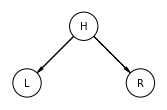

In [56]:
dagheight = CausalGraphicalModel(
    nodes=["H", "L", "R"], edges=[("H", "L"), ("H", "R")]
)
pgm = daft.PGM()
coordinates = {"H": (2, 0), "L": (1, 1), "R": (3, 1)}
for node in dag5_1.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dag5_1.dag.edges:
    pgm.add_edge(*edge)
pgm.render()
plt.gca().invert_yaxis()

In [57]:
dagheight.get_all_independence_relationships()

[('R', 'L', {'H'})]

<h2> Milk Colinearity </h2>

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

from scipy import stats
from scipy.optimize import curve_fit

warnings.simplefilter(action="ignore", category=FutureWarning)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
d = pd.read_csv("Data/milk.csv", sep=";")


def standardise(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()


d.loc[:, "K"] = standardise(d["kcal.per.g"])
d.loc[:, "F"] = standardise(d["perc.fat"])
d.loc[:, "L"] = standardise(d["perc.lactose"])

d.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,K,F,L
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16,-0.940041,-1.217243,1.307262
1,Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NaN,-0.816126,-1.030355,1.011285
2,Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NaN,-1.125913,-1.391531,1.382679
3,Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NaN,-1.001998,-1.335535,1.586874
4,Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NaN,-0.258511,-0.469693,0.257115


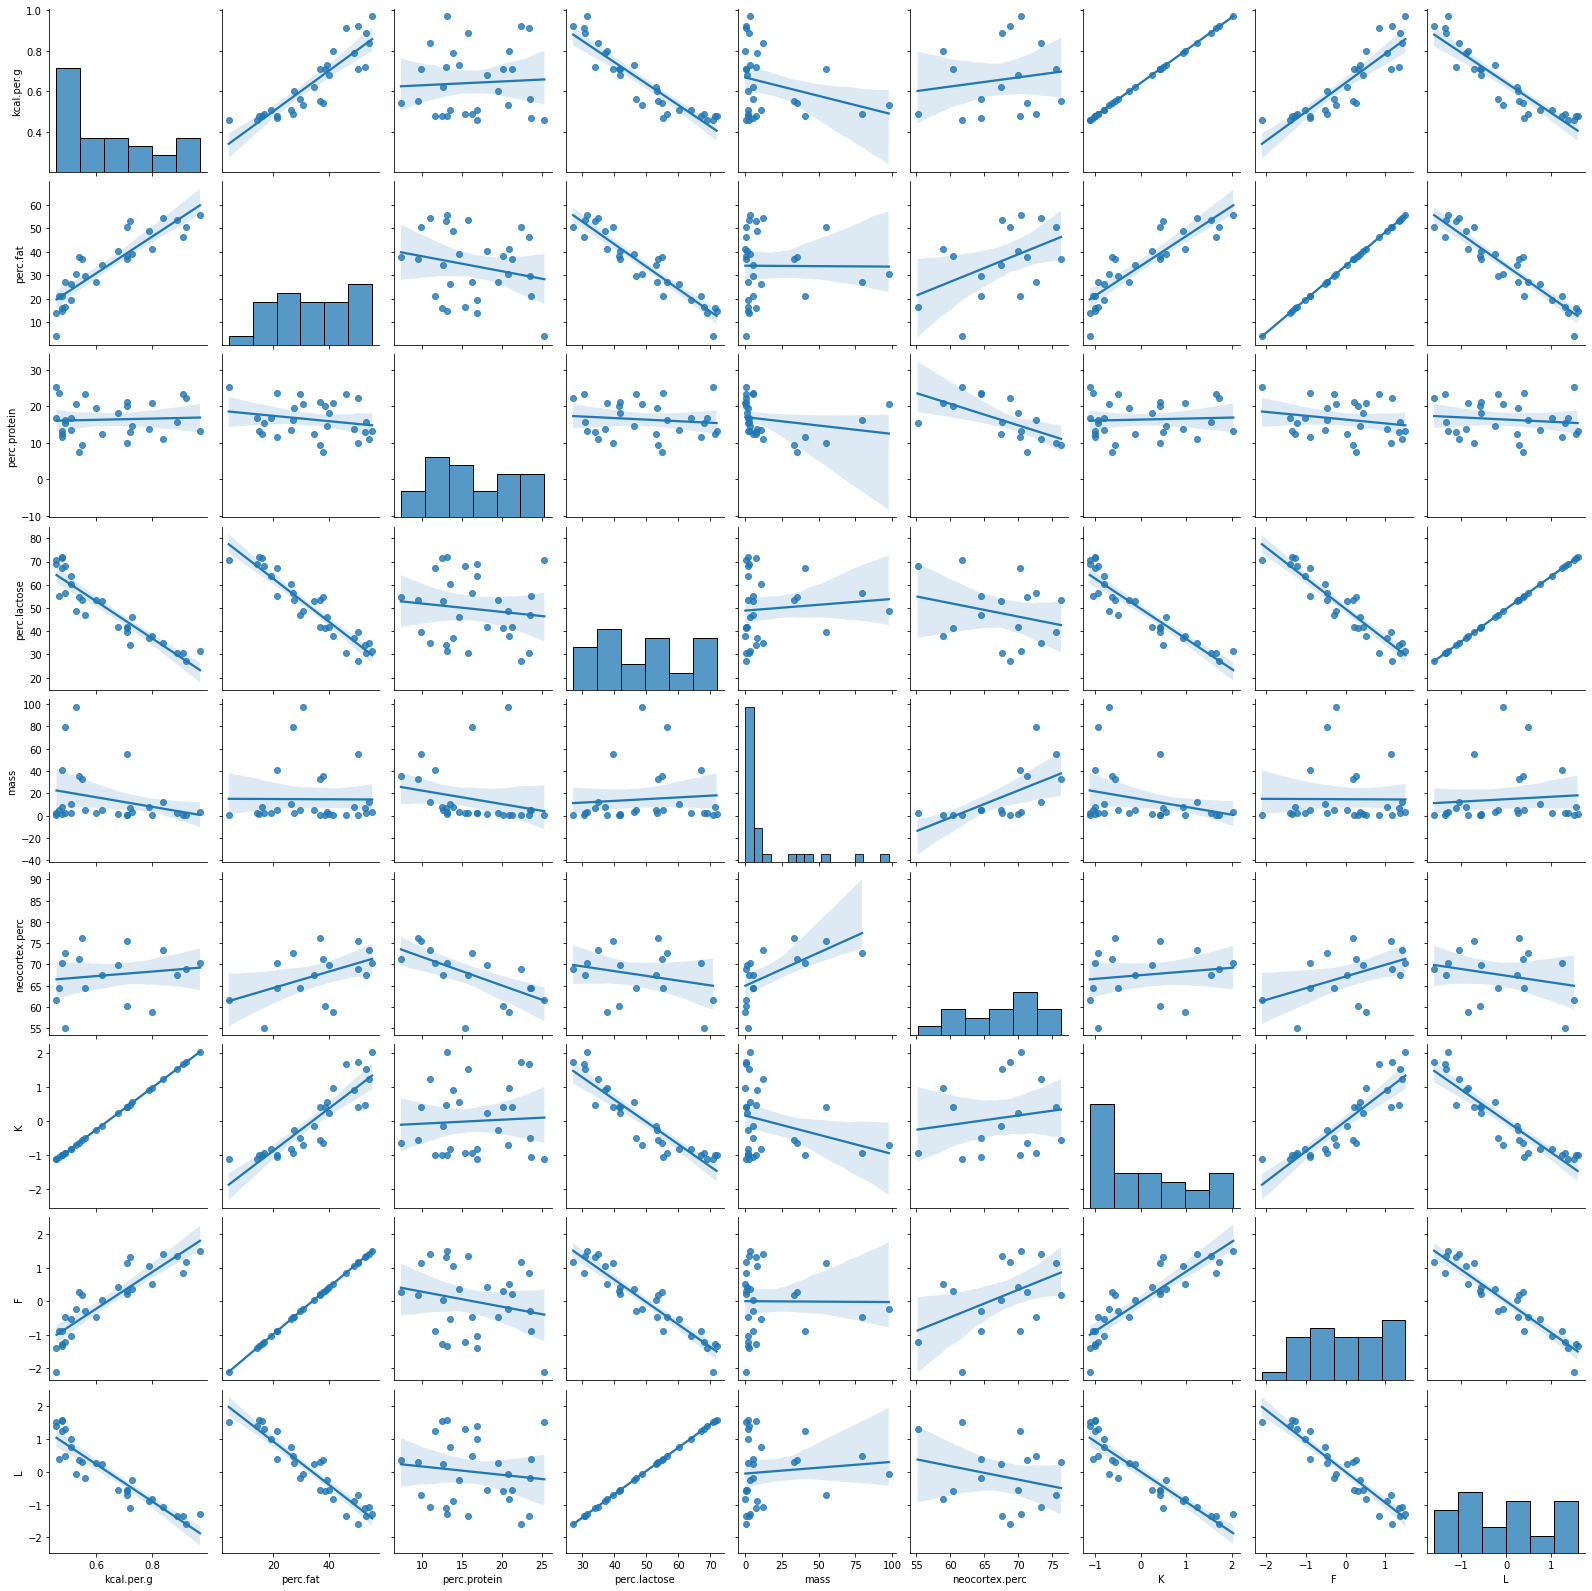

In [3]:
sns.pairplot(d,kind = "reg")

In [4]:
# kcal.per.g regressed on perc.fat
with pm.Model() as m_6_3:
    a = pm.Normal("a", 0, 0.2)
    bF = pm.Normal("bF", 0, 0.5)

    mu = a + bF * d.F
    sigma = pm.Exponential("sigma", 1)

    K = pm.Normal("K", mu, sigma, observed=d.K)

    m_6_3_trace = pm.sample()
    idata_m_6_3 = az.from_pymc3(m_6_3_trace)

az.summary(idata_m_6_3, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bF, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.00,0.09,-0.16,0.16,0.0,0.0,4616.78,2964.79,1.0
bF,0.86,0.09,0.69,1.04,0.0,0.0,4442.28,2650.65,1.0
sigma,0.49,0.07,0.38,0.63,0.0,0.0,3390.54,2661.21,1.0


In [5]:
# kcal.per.g regressed on perc.lactose
with pm.Model() as m_6_4:
    a = pm.Normal("a", 0, 0.2)
    bL = pm.Normal("bL", 0, 0.5)

    mu = a + bL * d.L
    sigma = pm.Exponential("sigma", 1)

    K = pm.Normal("K", mu, sigma, observed=d.K)

    m_6_4_trace = pm.sample()
    idata_m_6_4 = az.from_pymc3(m_6_4_trace)

az.summary(idata_m_6_4, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bL, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.00,0.07,-0.13,0.14,0.0,0.0,4354.14,2738.44,1.0
bL,-0.90,0.08,-1.05,-0.76,0.0,0.0,4357.84,2946.00,1.0
sigma,0.41,0.06,0.30,0.52,0.0,0.0,3264.21,2547.71,1.0


In [5]:
with pm.Model() as m_6_5:
    a = pm.Normal("a", 0, 0.2)
    bF = pm.Normal("bF", 0, 0.5)
    bL = pm.Normal("bL", 0, 0.5)

    mu = a + bF * d.F + bL * d.L
    sigma = pm.Exponential("sigma", 1)

    K = pm.Normal("K", mu, sigma, observed=d.K)

    m_6_5_trace = pm.sample()
    idata_m_6_5 = az.from_pymc3(m_6_5_trace)

az.summary(idata_m_6_5, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bL, bF, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7200331948135164, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.00,0.07,-0.13,0.13,0.0,0.0,2666.90,2179.71,1.0
bF,0.25,0.20,-0.09,0.62,0.0,0.0,1635.78,1828.36,1.0
bL,-0.67,0.19,-1.03,-0.30,0.0,0.0,1637.47,1890.14,1.0
sigma,0.41,0.06,0.30,0.52,0.0,0.0,1531.27,1017.23,1.0


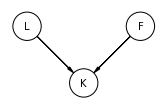

In [67]:
dagMiLK = CausalGraphicalModel(
    nodes=["K", "L", "F"], edges=[("L", "K"), ("F", "K")]
)
pgm = daft.PGM()
coordinates = {"K": (2, 2), "L": (1, 1), "F": (3, 1)}
for node in dagMiLK.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dagMiLK.dag.edges:
    pgm.add_edge(*edge)
pgm.render()
plt.gca().invert_yaxis()

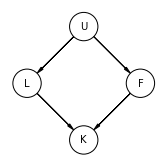

In [36]:
dagMiLK2 = CausalGraphicalModel(
    nodes=["K", "L", "F","U"], edges=[("L", "K"), ("F", "K"),("U","F"),("U","L")]
)
pgm = daft.PGM()
coordinates = {"K": (2, 2), "L": (1, 1), "F": (3, 1),"U":(2,0)}
for node in dagMiLK2.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in dagMiLK2.dag.edges:
    pgm.add_edge(*edge)
pgm.render()
plt.gca().invert_yaxis()

<h2>Post treatment effect of fungus </h2>

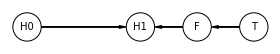

In [6]:
import daft

from causalgraphicalmodels import CausalGraphicalModel

plant_dag = CausalGraphicalModel(
    nodes=["H0", "H1", "F", "T"], edges=[("H0", "H1"), ("F", "H1"), ("T", "F")]
)
pgm = daft.PGM()
coordinates = {"H0": (0, 0), "T": (4, 0), "F": (3, 0), "H1": (2, 0)}
for node in plant_dag.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in plant_dag.dag.edges:
    pgm.add_edge(*edge)
pgm.render()
plt.gca().invert_yaxis()

In [69]:
 plant_dag.get_all_independence_relationships()

[('F', 'H0', set()),
 ('F', 'H0', {'T'}),
 ('H0', 'T', set()),
 ('H0', 'T', {'F'}),
 ('H0', 'T', {'F', 'H1'}),
 ('H1', 'T', {'F'}),
 ('H1', 'T', {'F', 'H0'})]

In [7]:
# number of plants
N = 100
# simulate initial heights
h0 = np.random.normal(10, 2, N)
# assign treatments and simulate fungus and growth
treatment = np.repeat([0, 1], N / 2)
fungus = np.random.binomial(n=1, p=0.5 - treatment * 0.4, size=N)
h1 = h0 + np.random.normal(5 - 3 * fungus, size=N)
# compose a clean data frame
d = pd.DataFrame.from_dict({"h0": h0, "h1": h1, "treatment": treatment, "fungus": fungus})

az.summary(d.to_dict(orient="list"), kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
h0,10.25,2.08,6.78,13.99
h1,14.38,2.48,10.66,19.92
treatment,0.50,0.50,0.00,1.00
fungus,0.32,0.47,0.00,1.00


In [8]:
import pymc3 as pm
with pm.Model() as m_6_6:
    p = pm.Lognormal("p", 0, 0.25)

    mu = p * d.h0
    sigma = pm.Exponential("sigma", 1)

    h1 = pm.Normal("h1", mu=mu, sigma=sigma, observed=d.h1)

    m_6_6_trace = pm.sample()

az.summary(m_6_6_trace, round_to=2)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,1.38,0.02,1.34,1.41,0.0,0.0,3658.45,2923.07,1.0
sigma,2.05,0.14,1.80,2.32,0.0,0.0,3634.85,2676.86,1.0


In [72]:
with pm.Model() as m_6_7:
    a = pm.Normal("a", 0, 0.2)
    bt = pm.Normal("bt", 0, 0.5)
    bf = pm.Normal("bf", 0, 0.5)

    p = a + bt * d.treatment + bf * d.fungus

    mu = p * d.h0
    sigma = pm.Exponential("sigma", 1)

    h1 = pm.Normal("h1", mu=mu, sigma=sigma, observed=d.h1)

    m_6_7_trace = pm.sample()

az.summary(m_6_7_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bf, bt, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:11<00:00, 174.76draws/s]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,1.47,0.03,1.42,1.51,0.0,0.0,399.39,399.39,402.03,594.65,1.0
bt,-0.01,0.03,-0.06,0.04,0.0,0.0,420.03,420.03,420.61,637.49,1.0
bf,-0.27,0.03,-0.33,-0.21,0.0,0.0,439.44,439.44,438.61,556.70,1.0
sigma,1.28,0.09,1.11,1.45,0.0,0.0,775.23,775.23,770.64,788.02,1.0


In [73]:
with pm.Model() as m_6_8:
    a = pm.Normal("a", 0, 0.2)
    bt = pm.Normal("bt", 0, 0.5)

    p = a + bt * d.treatment

    mu = p * d.h0
    sigma = pm.Exponential("sigma", 1)

    h1 = pm.Normal("h1", mu=mu, sigma=sigma, observed=d.h1)

    m_6_8_trace = pm.sample()

az.summary(m_6_8_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bt, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:08<00:00, 226.13draws/s]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,1.31,0.03,1.26,1.35,0.00,0.0,495.66,492.46,493.40,344.86,1.0
bt,0.12,0.04,0.06,0.19,0.00,0.0,451.49,451.49,459.81,454.24,1.0
sigma,1.79,0.13,1.53,2.02,0.01,0.0,634.11,634.11,634.20,440.61,1.0


<h2>Happiness</h2>

In [74]:
def inv_logit(x):
    return np.exp(x) / (1 + np.exp(x))


def sim_happiness(N_years=100, seed=1234):
    np.random.seed(seed)

    popn = pd.DataFrame(np.zeros((20 * 65, 3)), columns=["age", "happiness", "married"])
    popn.loc[:, "age"] = np.repeat(np.arange(65), 20)
    popn.loc[:, "happiness"] = np.repeat(np.linspace(-2, 2, 20), 65)
    popn.loc[:, "married"] = np.array(popn.loc[:, "married"].values, dtype="bool")

    for i in range(N_years):
        # age population
        popn.loc[:, "age"] += 1
        # replace old folk with new folk
        ind = popn.age == 65
        popn.loc[ind, "age"] = 0
        popn.loc[ind, "married"] = False
        popn.loc[ind, "happiness"] = np.linspace(-2, 2, 20)

        # do the work
        elligible = (popn.married == 0) & (popn.age >= 18)
        marry = np.random.binomial(1, inv_logit(popn.loc[elligible, "happiness"] - 4)) == 1
        popn.loc[elligible, "married"] = marry

    popn.sort_values("age", inplace=True, ignore_index=True)

    return popn

In [75]:
popn = sim_happiness()

popn_summ = popn.copy()
popn_summ["married"] = popn_summ["married"].astype(
    int
)  # this is necessary before using az.summary, which doesn't work with boolean columns.
az.summary(popn_summ.to_dict(orient="list"), kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
age,32.00,18.77,0.0,61.00
happiness,-0.00,1.21,-2.0,1.79
married,0.28,0.45,0.0,1.00


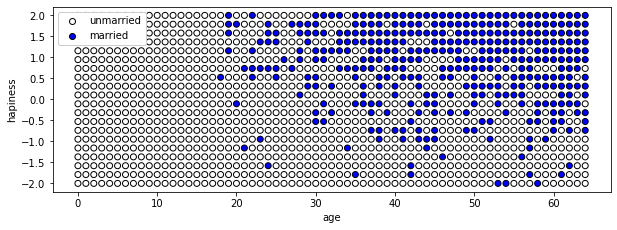

In [76]:
# Figure 6.4
fig, ax = plt.subplots(figsize=[10, 3.4])

colors = np.array(["w"] * popn.shape[0])
colors[popn.married] = "b"
ax.scatter(popn.age, popn.happiness, edgecolor="k", color=colors)

ax.scatter([], [], edgecolor="k", color="w", label="unmarried")
ax.scatter([], [], edgecolor="k", color="b", label="married")
ax.legend(loc="upper left", framealpha=1, frameon=True)

ax.set_xlabel("age")
ax.set_ylabel("hapiness");

In [77]:
adults = popn.loc[popn.age > 17]
adults.loc[:, "A"] = (adults["age"].copy() - 18) / (65 - 18)

/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gokhansahin/opt/anaconda3/envs/MCelreath-pymc3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [50]:
mid = pd.Categorical(adults.loc[:, "married"].astype(int))

with pm.Model() as m_6_9:
    a = pm.Normal("a", 0, 1, shape=2)
    bA = pm.Normal("bA", 0, 2)

    mu = a[mid] + bA * adults.A.values
    sigma = pm.Exponential("sigma", 1)

    happiness = pm.Normal("happiness", mu, sigma, observed=adults.happiness.values)

    m_6_9_trace = pm.sample(1000)

az.summary(m_6_9_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:10<00:00, 288.92draws/s]
WARNING (theano.gof.cmodule): Removing key file /Users/gokhansahin/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.5-64/tmp36gg7n5y/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/gokhansahin/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.5-64/tmp3cl0d_76/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/gokhansahin/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.8.5-64/tmp3x1ynmdo/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /Users/gokhansahin/.theano/compiledir_macOS-10.15.4-x86_64-i386-64bit-i386-3.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a[0],-0.20,0.07,-0.33,-0.08,0.0,0.0,702.92,702.92,702.61,912.05,1.0
a[1],1.22,0.09,1.04,1.38,0.0,0.0,793.90,787.04,794.57,831.24,1.0
bA,-0.72,0.12,-0.94,-0.50,0.0,0.0,646.83,644.53,647.75,812.94,1.0
sigma,1.02,0.02,0.98,1.07,0.0,0.0,1295.73,1295.73,1299.94,1307.02,1.0


In [51]:
with pm.Model() as m6_10:
    a = pm.Normal("a", 0, 1)
    bA = pm.Normal("bA", 0, 2)

    mu = a + bA * adults.A.values
    sigma = pm.Exponential("sigma", 1)

    happiness = pm.Normal("happiness", mu, sigma, observed=adults.happiness.values)

    trace_6_10 = pm.sample(1000)

az.summary(trace_6_10, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:07<00:00, 419.00draws/s]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,-0.00,0.08,-0.13,0.15,0.0,0.0,846.29,729.36,841.18,835.18,1.0
bA,0.00,0.13,-0.25,0.25,0.0,0.0,907.71,691.44,906.78,823.99,1.0
sigma,1.22,0.03,1.17,1.27,0.0,0.0,1196.50,1196.50,1195.69,1195.88,1.0


In [78]:
dag_6_1 = CausalGraphicalModel(
    nodes=["X", "Y", "C", "U", "B", "A"],
    edges=[
        ("X", "Y"),
        ("U", "X"),
        ("A", "U"),
        ("A", "C"),
        ("C", "Y"),
        ("U", "B"),
        ("C", "B"),
    ],
)
all_adjustment_sets = dag_6_1.get_all_backdoor_adjustment_sets("X", "Y")
all_adjustment_sets

frozenset({frozenset({'A'}),
           frozenset({'A', 'B', 'C'}),
           frozenset({'A', 'B', 'U'}),
           frozenset({'A', 'C'}),
           frozenset({'B', 'U'}),
           frozenset({'C'}),
           frozenset({'U'}),
           frozenset({'C', 'U'}),
           frozenset({'B', 'C', 'U'}),
           frozenset({'A', 'U'}),
           frozenset({'A', 'C', 'U'}),
           frozenset({'B', 'C'}),
           frozenset({'A', 'B', 'C', 'U'})})

In [55]:
for s in all_adjustment_sets:
    if all(not t.issubset(s) for t in all_adjustment_sets if t != s):
        if s != {"U"}:
            print(s)

frozenset({'A'})
frozenset({'C'})


<h1>GRand Parent Effect</h2>


In [9]:
N = 200  # number of of grandparent-parent-child triads
b_GP = 1  # direct effect of G on P
b_GC = 0  # direct effect of G on C
b_PC = 1  # direct effect of P on C
b_U = 2  # direct effect of U on P and C

In [10]:
U = 2 * np.random.binomial(1, 0.5, N) - 1
G = np.random.normal(size=N)
P = np.random.normal(b_GP * G + b_U * U)
C = np.random.normal(b_PC * P + b_GC * G + b_U * U)
d = pd.DataFrame.from_dict({"C": C, "P": P, "G": G, "U": U})

Text(0, 0.5, 'grandchild education (C)')

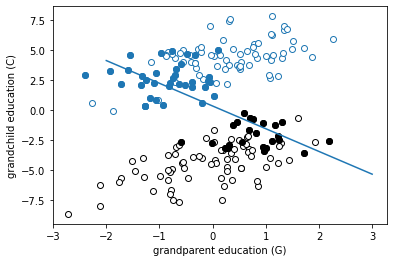

In [11]:
# Figure 6.5

# grandparent education
bad = U < 0
good = ~bad
plt.scatter(G[good], C[good], color="w", lw=1, edgecolor="C0")
plt.scatter(G[bad], C[bad], color="w", lw=1, edgecolor="k")

# parents with similar education
eP = (P > -1) & (P < 1)
plt.scatter(G[good & eP], C[good & eP], color="C0", lw=1, edgecolor="C0")
plt.scatter(G[bad & eP], C[bad & eP], color="k", lw=1, edgecolor="k")


p = np.polyfit(G[eP], C[eP], 1)
xn = np.array([-2, 3])
plt.plot(xn, np.polyval(p, xn))

plt.xlabel("grandparent education (G)")
plt.ylabel("grandchild education (C)")

In [82]:
with pm.Model() as m_6_11:
    a = pm.Normal("a", 0, 1)
    p_PC = pm.Normal("b_PC", 0, 1)
    p_GC = pm.Normal("b_GC", 0, 1)

    mu = a + p_PC * d.P + p_GC * d.G
    sigma = pm.Exponential("sigma", 1)

    pC = pm.Normal("C", mu, sigma, observed=d.C)

    m_6_11_trace = pm.sample()

az.summary(m_6_11_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b_GC, b_PC, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:12<00:00, 161.51draws/s]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.15,0.10,-0.03,0.34,0.0,0.0,1438.13,1064.35,1408.26,780.20,1.0
b_PC,1.76,0.04,1.68,1.84,0.0,0.0,1036.78,1036.78,1038.26,783.53,1.0
b_GC,-0.87,0.11,-1.08,-0.68,0.0,0.0,883.80,872.79,881.19,680.61,1.0
sigma,1.35,0.07,1.22,1.49,0.0,0.0,1522.25,1507.20,1514.11,771.52,1.0


In [83]:
with pm.Model() as m_6_12:
    a = pm.Normal("a", 0, 1)
    p_PC = pm.Normal("b_PC", 0, 1)
    p_GC = pm.Normal("b_GC", 0, 1)
    p_U = pm.Normal("b_U", 0, 1)

    mu = a + p_PC * d.P + p_GC * d.G + p_U * d.U
    sigma = pm.Exponential("sigma", 1)

    pC = pm.Normal("C", mu, sigma, observed=d.C)

    m_6_12_trace = pm.sample()

az.summary(m_6_12_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b_U, b_GC, b_PC, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:11<00:00, 173.61draws/s]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.07,0.07,-0.05,0.20,0.00,0.00,900.78,643.15,895.67,809.87,1.00
b_PC,0.88,0.08,0.75,1.03,0.00,0.00,276.21,276.21,274.22,425.51,1.01
b_GC,-0.01,0.11,-0.21,0.18,0.01,0.00,375.59,375.59,372.32,503.02,1.00
b_U,2.17,0.17,1.82,2.46,0.01,0.01,307.84,307.27,305.20,572.45,1.00
sigma,1.01,0.05,0.92,1.11,0.00,0.00,687.98,687.98,682.76,661.41,1.00
